In [1]:
df = "yelp_academic_dataset_review.json"
with open(df, 'r') as f:
    preview = f.read(600)
    print("600 dong dau tien cua file:")
    print(preview)
    print("...............................")

600 dong dau tien cua file:
{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt 
...............................


In [ ]:
import json

filename = "yelp_academic_dataset_review.json" 

print(f"Đang đọc thử dòng đầu tiên của {filename}...\n")

try:
    with open(filename, 'r', encoding='utf-8') as f:
        first_line = f.readline()
        

        sample_data = json.loads(first_line)
        
        print("--- CẤU TRÚC TÌM THẤY ---")
        print(f"Loại dữ liệu gốc: {type(sample_data)}") 
        
        print("\n--- CÁC TRƯỜNG DỮ LIỆU (SCHEMA) ---")
        print(f"{'TÊN TRƯỜNG (KEY)':<20} | {'KIỂU DỮ LIỆU':<15} | {'VÍ DỤ GIÁ TRỊ'}")
        print("-" * 60)
        
        for key, value in sample_data.items():

            val_str = str(value)
            if len(val_str) > 30: val_str = val_str[:27] + "..."
            
            print(f"{key:<20} | {type(value).__name__:<15} | {val_str}")

except json.JSONDecodeError:
    print(" CẢNH BÁO: Dòng đầu tiên không phải là JSON hợp lệ.")
    print("Khả năng file này là một mảng JSON lớn bắt đầu bằng '[' nhưng bạn đang đọc theo dòng.")
    print("Nội dung đọc được:", first_line[:50])
except Exception as e:
    print(f"Lỗi: {e}")

Đang đọc thử dòng đầu tiên của yelp_academic_dataset_review.json...

--- CẤU TRÚC TÌM THẤY ---
Loại dữ liệu gốc: <class 'dict'>

--- CÁC TRƯỜNG DỮ LIỆU (SCHEMA) ---
TÊN TRƯỜNG (KEY)     | KIỂU DỮ LIỆU    | VÍ DỤ GIÁ TRỊ
------------------------------------------------------------
review_id            | str             | KU_O5udG6zpxOg-VcAEodg
user_id              | str             | mh_-eMZ6K5RLWhZyISBhwA
business_id          | str             | XQfwVwDr-v0ZS3_CbbE5Xw
stars                | float           | 3.0
useful               | int             | 0
funny                | int             | 0
cool                 | int             | 0
text                 | str             | If you decide to eat here, ...
date                 | str             | 2018-07-07 22:09:11


                                          clean_text  stars
0  if you decide to eat here just be aware it is ...      3
1  ive taken a lot of spin classes over the years...      5
2  family diner had the buffet eclectic assortmen...      3
3  wow yummy different delicious our favorite is ...      5
4  cute interior and owner gave us tour of upcomi...      4


C:\Users\Admin\AppData\Local\Temp\ipykernel_10716\4026116686.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


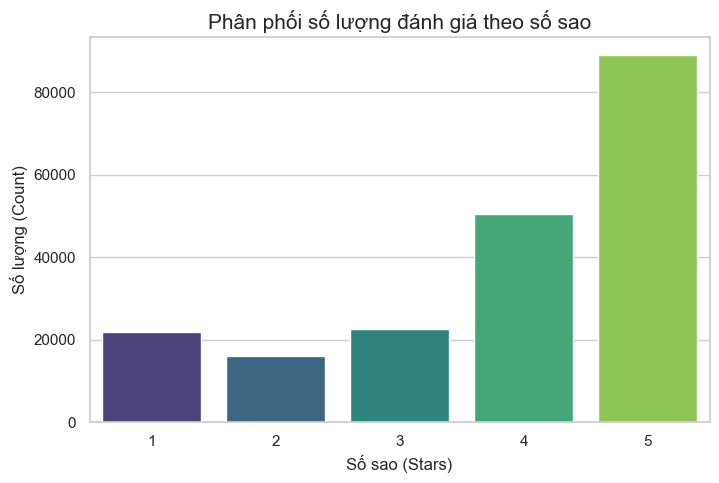

C:\Users\Admin\AppData\Local\Temp\ipykernel_10716\4026116686.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='word_count', data=df, palette='coolwarm')


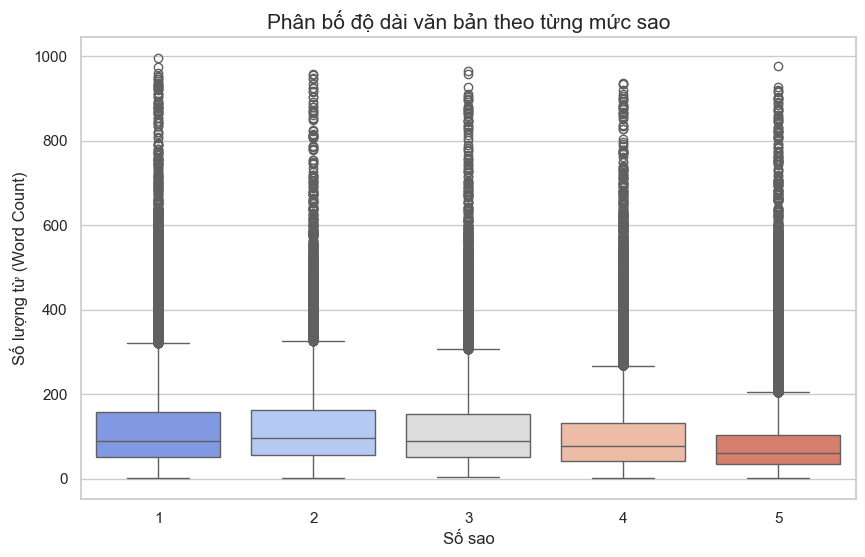

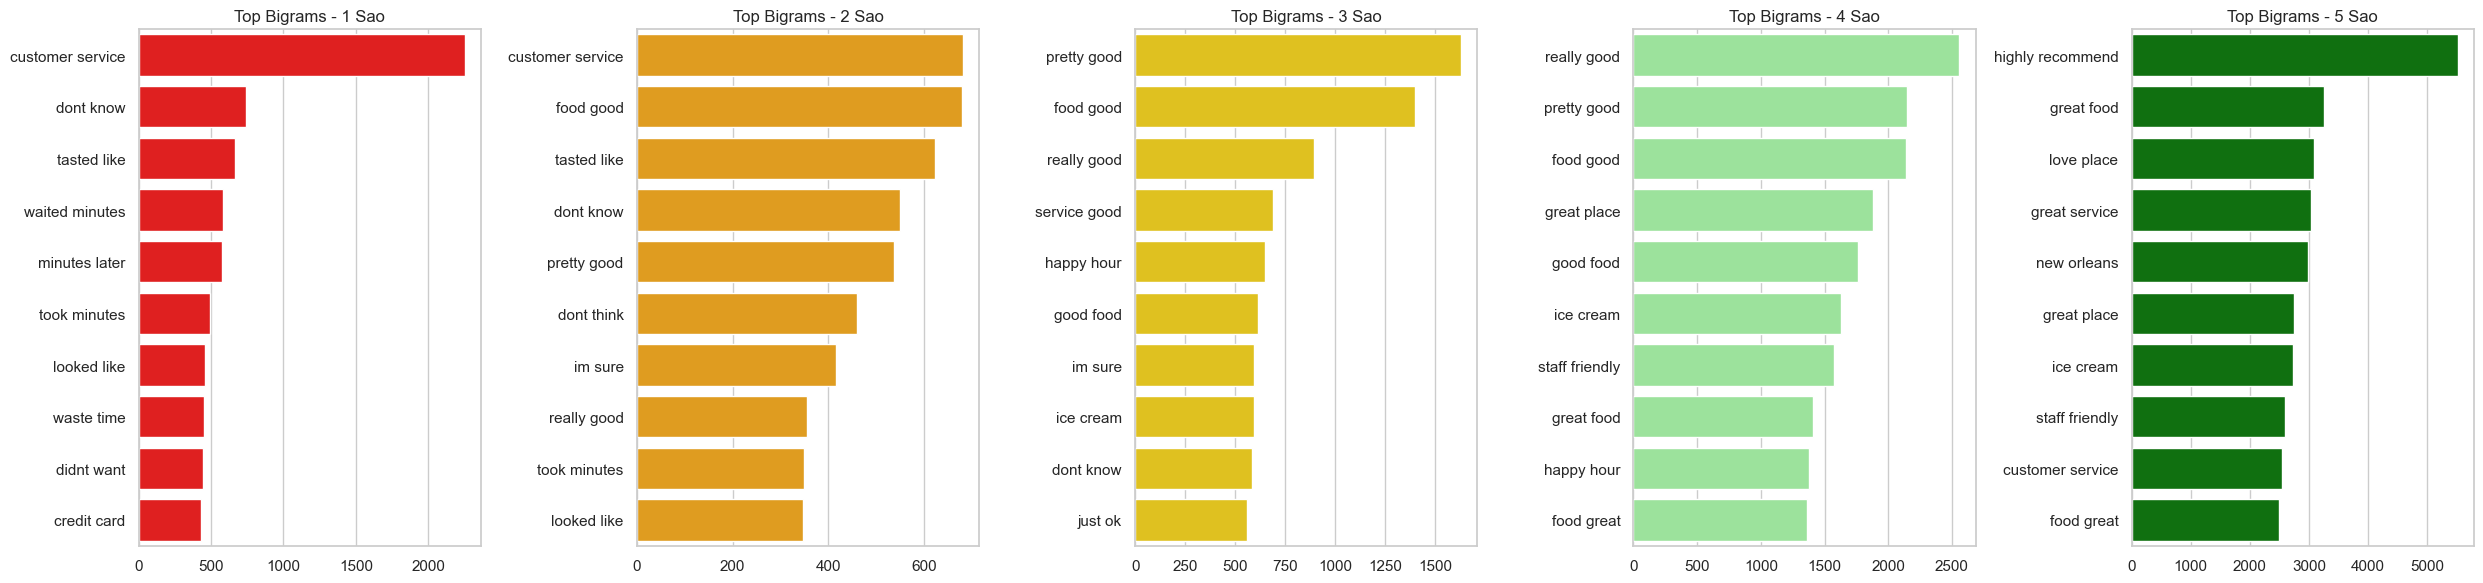

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


filename = 'yelp_preprocessed.csv' 


df = pd.read_csv(filename)

df = df.dropna(subset=['clean_text', 'stars'])

df['stars'] = df['stars'].astype(int)
print(df.head())


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Phân phối số lượng đánh giá theo số sao', fontsize=15)
plt.xlabel('Số sao (Stars)')
plt.ylabel('Số lượng (Count)')
plt.show()

# Tạo cột đếm số từ
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='word_count', data=df, palette='coolwarm')
plt.title('Phân bố độ dài văn bản theo từng mức sao', fontsize=15)
plt.xlabel('Số sao')
plt.ylabel('Số lượng từ (Word Count)')

plt.show()

def plot_top_ngrams(corpus, n=2, top_k=10, ax=None, color='blue', title=""):
    """
    Hàm vẽ biểu đồ Top N-grams
    n=2: Bigram (cụm 2 từ), n=3: Trigram
    """

    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    top_df = pd.DataFrame(words_freq[:top_k], columns=['Text', 'Count'])
    
    sns.barplot(x='Count', y='Text', data=top_df, ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharex=False)

colors = ['red', 'orange', 'gold', 'lightgreen', 'green'] 

for i, star in enumerate([1, 2, 3, 4, 5]):
    subset = df[df['stars'] == star]['clean_text']
    
    if len(subset) > 0:
        try:
            plot_top_ngrams(subset, n=2, top_k=10, ax=axes[i], color=colors[i], 
                            title=f'Top Bigrams - {star} Sao')
        except ValueError:
            axes[i].set_title(f'{star} Sao (Không đủ dữ liệu)')
    else:
        axes[i].set_title(f'{star} Sao (Trống)')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

def clean_and_save(file_path, save_path):
   
    df = pd.read_csv(file_path)
    initial_shape = df.shape[0]
    df_cleaned = df.dropna(subset=['clean_text', 'stars'])
  
    df_cleaned = df_cleaned.reset_index(drop=True)
    
    df_cleaned.to_csv(save_path, index=False)
    
    final_shape = df_cleaned.shape[0]
    print(f"File: {file_path}")
    print(f" - Số dòng ban đầu: {initial_shape}")
    print(f" - Số dòng sau khi xoá null: {final_shape}")
    print(f" - Đã xoá: {initial_shape - final_shape} dòng.")
    print(f" - Đã lưu tại: {save_path}\n")


clean_and_save('yelp_preprocessed.csv', 'yelp_preprocessed.csv')
clean_and_save('test.csv', 'test.csv')

File: yelp_preprocessed.csv
 - Số dòng ban đầu: 200000
 - Số dòng sau khi xoá null: 199994
 - Đã xoá: 6 dòng.
 - Đã lưu tại: yelp_preprocessed.csv

File: test.csv
 - Số dòng ban đầu: 60000
 - Số dòng sau khi xoá null: 59997
 - Đã xoá: 3 dòng.
 - Đã lưu tại: test.csv



In [ ]:
import pandas as pd
import numpy as np
import torch
import joblib
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_NAME = 'bert-base-uncased'
MAX_LEN = 128
BATCH_SIZE = 32

# 1. LOAD VÀ CHIA DỮ LIỆU (60% Train, 30% Test, 10% Val)
df = pd.read_csv('yelp_preprocessed.csv') 

# Chia 60% Train và 40% còn lại
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['stars'])

# Chia 40% còn lại thành 30% Test và 10% Val (tỷ lệ 3:1)
test_df, val_df = train_test_split(temp_df, test_size=0.25, random_state=42, stratify=temp_df['stars'])

print(f"Dữ liệu gốc: {len(df)}")
print(f"Train: {len(train_df)} | Test: {len(test_df)} | Val: {len(val_df)}")
test_df.to_csv('test.csv', index=False)
val_df.to_csv('val.csv', index=False)

# 2. HÀM TRÍCH XUẤT ĐẶC TRƯNG BERT (CLS Token)
def extract_bert_features(text_list):
    tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
    model = BertModel.from_pretrained(MODEL_NAME).to(DEVICE)
    model.eval()
    
    features = []
    with torch.no_grad():
        for i in range(0, len(text_list), BATCH_SIZE):
            batch_text = text_list[i : i + BATCH_SIZE]
            inputs = tokenizer(batch_text, padding=True, truncation=True, 
                               max_length=MAX_LEN, return_tensors="pt").to(DEVICE)
            
            outputs = model(**inputs)
            # Lấy CLS token (vector 768 chiều đại diện cho cả câu)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            features.append(cls_embeddings)
            
            if (i // BATCH_SIZE) % 10 == 0:
                print(f"Đang trích xuất: {i}/{len(text_list)}...")
                
    return np.vstack(features)

print("\n--- Đang biến đổi văn bản tập Train thành Vector (768 chiều) ---")
X_train_vectors = extract_bert_features(train_df['clean_text'].tolist())
y_train = train_df['stars'].values

# 3. ÁP DỤNG SMOTE ĐỂ CÂN BẰNG TẬP TRAIN
print("\n--- Đang thực hiện SMOTE cân bằng dữ liệu ---")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vectors, y_train)

print(f"Kích thước sau SMOTE: {X_resampled.shape}")
print("Phân bố nhãn sau SMOTE:")
print(pd.Series(y_resampled).value_counts())

# 4. LƯU DỮ LIỆU SAU SMOTE
joblib.dump(X_resampled, 'X_train_smote.pkl')
pd.DataFrame(y_resampled, columns=['stars']).to_csv('y_train_smote.csv', index=False)

print("\n--- HOÀN TẤT! Đã lưu file X_train_smote.pkl và y_train_smote.csv ---")

c:\activities\DLProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dữ liệu gốc: 199994
Train: 119996 | Test: 59998 | Val: 20000

--- Đang biến đổi văn bản tập Train thành Vector (768 chiều) ---
Đang trích xuất: 0/119996...
Đang trích xuất: 320/119996...
Đang trích xuất: 640/119996...
Đang trích xuất: 960/119996...
Đang trích xuất: 1280/119996...
Đang trích xuất: 1600/119996...
Đang trích xuất: 1920/119996...
Đang trích xuất: 2240/119996...
Đang trích xuất: 2560/119996...
Đang trích xuất: 2880/119996...
Đang trích xuất: 3200/119996...
Đang trích xuất: 3520/119996...
Đang trích xuất: 3840/119996...
Đang trích xuất: 4160/119996...
Đang trích xuất: 4480/119996...
Đang trích xuất: 4800/119996...
Đang trích xuất: 5120/119996...
Đang trích xuất: 5440/119996...
Đang trích xuất: 5760/119996...
Đang trích xuất: 6080/119996...
Đang trích xuất: 6400/119996...
Đang trích xuất: 6720/119996...
Đang trích xuất: 7040/119996...
Đang trích xuất: 7360/119996...
Đang trích xuất: 7680/119996...
Đang trích xuất: 8000/119996...
Đang trích xuất: 8320/119996...
Đang trích xuất

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('yelp_preprocessed.csv') 

# Chia 60% Train và 40% còn lại
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['stars'])

# Chia 40% còn lại thành 30% Test và 10% Val (tỷ lệ 3:1)
test_df, val_df = train_test_split(temp_df, test_size=0.25, random_state=42, stratify=temp_df['stars'])

print(f"Dữ liệu gốc: {len(df)}")
print(f"Train: {len(train_df)} | Test: {len(test_df)} | Val: {len(val_df)}")

test_df.to_csv('test.csv', index=False)
val_df.to_csv('val.csv', index=False)
train_df.to_csv('train.csv', index=False)

Dữ liệu gốc: 199994
Train: 119996 | Test: 59998 | Val: 20000
